# Lesson 12 - Titanic Dataset

### The following topics are discussed in this notebook:
### Applying Logistic Regression and KNN Classifiers to the Titanic Dataset
Download   the file data/titanic.txt

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Import the Data

This dataset contains information about the 887 passengers on the voyage of the Titanic. Of the columns available, we will be particularly interested in the following:

* **`Survived`** - Binary variable indicating whether or not the passenger survived the voyage. 
* **`Pclass`** - Categorical variable indicating the passenger class. 
* **`Sex`** - Categorical variable indicating the gender of the passenger. 
* **`Age`** - Age of the passenger.


We will create models to predict the survival based on Pclass, Sex, and Age.

In [82]:
df = pd.read_csv('data/titanic.txt', sep='\t')
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [83]:
#checking the size of the dataframe
print(df.shape)

(887, 8)


In [84]:
#checking how many NA values we have in each column of the dataframe
df.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

# Visually Inspect Data

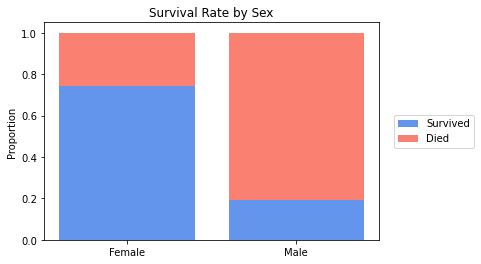

In [85]:
female_survival_rate = np.sum((df.Sex == 'female') & (df.Survived == 1)) / np.sum(df.Sex == 'female')
male_survival_rate = np.sum((df.Sex == 'male') & (df.Survived == 1)) / np.sum(df.Sex == 'male')
sex_survival_rates = np.array([female_survival_rate, male_survival_rate])
sex_death_rates = 1 - sex_survival_rates

plt.figure(figsize=[6,4])
plt.bar(range(2),sex_survival_rates, label='Survived', color='cornflowerblue')
plt.bar(range(2),sex_death_rates, label='Died', bottom=sex_survival_rates, color='Salmon')
plt.legend(loc="center left", bbox_to_anchor=(1.03,0.5))
plt.xticks(range(2), ['Female', 'Male'])
plt.ylabel('Proportion')
plt.title('Survival Rate by Sex')
plt.show()

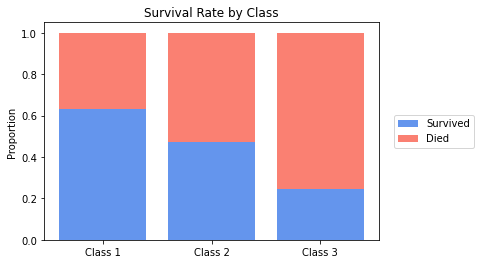

In [86]:
class1_survival_rate = np.sum((df.Pclass == 1) & (df.Survived == 1)) / np.sum(df.Pclass == 1)
class2_survival_rate = np.sum((df.Pclass == 2) & (df.Survived == 1)) / np.sum(df.Pclass == 2)
class3_survival_rate = np.sum((df.Pclass == 3) & (df.Survived == 1)) / np.sum(df.Pclass == 3)
class_survival_rates = np.array([class1_survival_rate, class2_survival_rate, class3_survival_rate])
class_death_rates = 1 - class_survival_rates

plt.figure(figsize=[6,4])
plt.bar(range(3),class_survival_rates, label='Survived', color='cornflowerblue')
plt.bar(range(3),class_death_rates, label='Died', bottom=class_survival_rates, color='Salmon')
plt.legend(loc="center left", bbox_to_anchor=(1.03,0.5))
plt.xticks(range(3), ['Class 1', 'Class 2', 'Class 3'])
plt.ylabel('Proportion')
plt.title('Survival Rate by Class')
plt.show()

# now - let's build some models from this dataframe
# Separate Numerical and Categorical Columns

In [87]:
Xnum = df.iloc[:, [4]].values
Xcat = df.iloc[:, [1, 3]].values.astype('str')
y = df.iloc[:, 0].values

print(Xnum.shape)
print(Xcat.shape)
print(y.shape)

(887, 1)
(887, 2)
(887,)


# Create Train Test Split

In [88]:
Xnum_train, Xnum_holdout, y_train, y_holdout = train_test_split(Xnum, y, test_size = 0.3, random_state=1)
Xnum_val, Xnum_test, y_val, y_test = train_test_split(Xnum_holdout, y_holdout, test_size = 0.5, random_state=1)

Xcat_train, Xcat_holdout, y_train, y_holdout = train_test_split(Xcat, y, test_size = 0.3, random_state=1)
Xcat_val, Xcat_test, y_val, y_test = train_test_split(Xcat_holdout, y_holdout, test_size = 0.5, random_state=1)

print(Xnum_train.shape)
print(Xnum_val.shape)
print(Xnum_test.shape)
print()
print(Xcat_train.shape)
print(Xcat_val.shape)
print(Xcat_test.shape)

(620, 1)
(133, 1)
(134, 1)

(620, 2)
(133, 2)
(134, 2)


# Encode Categorical Features

In [89]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(Xcat_train)

Xenc_train_ = encoder.transform(Xcat_train)
Xenc_val_   = encoder.transform(Xcat_val)
Xenc_test_  = encoder.transform(Xcat_test)

print(Xenc_train_.shape)
print(Xenc_val_.shape)
print(Xenc_test_.shape)

(620, 5)
(133, 5)
(134, 5)


# Delete extra columns

In [90]:
Xenc_train = np.delete(Xenc_train_, [0, 3], axis=1)
Xenc_val = np.delete(Xenc_val_, [0, 3], axis=1)
Xenc_test = np.delete(Xenc_test_, [0, 3], axis=1)

print(Xenc_train.shape)
print(Xenc_val.shape)
print(Xenc_test.shape)

(620, 3)
(133, 3)
(134, 3)


# Scale Numerical Featuers

In [91]:
scaler = StandardScaler()
scaler.fit(Xnum_train)

Xsca_train = scaler.transform(Xnum_train)
Xsca_val   = scaler.transform(Xnum_val)
Xsca_test  = scaler.transform(Xnum_test)

print(Xsca_train.shape)
print(Xsca_val.shape)
print(Xsca_test.shape)


(620, 1)
(133, 1)
(134, 1)


# Merge Feature Arrays

In [92]:
X_train = np.hstack([Xsca_train, Xenc_train])
X_val = np.hstack([Xsca_val, Xenc_val])
X_test = np.hstack([Xsca_test, Xenc_test])

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(X_train[0:3,:])

(620, 4)
(133, 4)
(134, 4)
[[-0.11262358  0.          1.          1.        ]
 [-0.66515864  0.          1.          1.        ]
 [ 0.09457707  0.          1.          1.        ]]


# Create Logistic Regression Mode

In [93]:
#this LogisticRegression model has the default regularization parameter C=1
logreg_model = LogisticRegression(solver='lbfgs')
logreg_model.fit(X_train, y_train)

print('Training Accuracy:  ', logreg_model.score(X_train, y_train))
print('Validation Accuracy:', logreg_model.score(X_val, y_val))


Training Accuracy:   0.8016129032258065
Validation Accuracy: 0.7894736842105263


## Perhaps we can get better results with the different C?
## Select Value of Regularization Parameter C


EXP_LIST
[-3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4
 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4
  2.6  2.8  3. ]

VAL_ACC
[0.6090225563909775, 0.6090225563909775, 0.6090225563909775, 0.6090225563909775, 0.6390977443609023, 0.6917293233082706, 0.7518796992481203, 0.7669172932330827, 0.7669172932330827, 0.7744360902255639, 0.7819548872180451, 0.7819548872180451, 0.7744360902255639, 0.7819548872180451, 0.7894736842105263, 0.7894736842105263, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075, 0.7894736842105263, 0.7894736842105263, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075, 0.7969924812030075]

MAX VAL_ACC is  0.7969924812030075


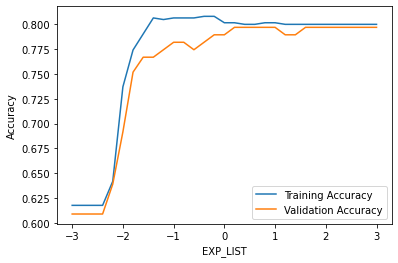

In [94]:
exp_list = np.linspace(-3,3, 31)
print("\nEXP_LIST")
print(exp_list)
tr_acc = []
va_acc = []

for k in exp_list:
    temp_model = LogisticRegression(solver='lbfgs', C=10**k)
    temp_model.fit(X_train, y_train)

    tr_acc.append(temp_model.score(X_train, y_train))
    va_acc.append(temp_model.score(X_val, y_val))
   
print("\nVAL_ACC")
print(va_acc)
print()
print("MAX VAL_ACC is ", max(va_acc))

plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, va_acc, label='Validation Accuracy')
plt.xlabel('EXP_LIST')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [95]:
#note that the largest validation score we get for C between  10**1.6 and 10**3
#the VAL_SCORE is the same in that range
#let's pick  C=10**2
logreg_model = LogisticRegression(solver='lbfgs', C=10**2)
logreg_model.fit(X_train, y_train)

print('Training Accuracy:  ', logreg_model.score(X_train, y_train))
print('Validation Accuracy:', logreg_model.score(X_val, y_val))
print('Testing Accuracy:   ', logreg_model.score(X_test, y_test))

Training Accuracy:   0.8
Validation Accuracy: 0.7969924812030075
Testing Accuracy:    0.746268656716418


# Now we build a sequence of KNN models with p=2
# and choose the best one

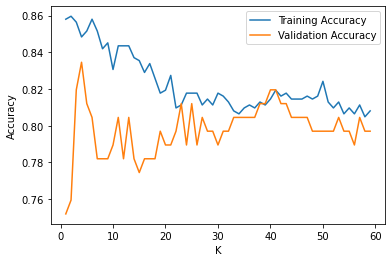

In [96]:
tr_acc = []
va_acc = []

k_range = range(1, 60)

for k in k_range:
    # KNeighborsClassifier(k)  has the default of p=2
    temp_model = KNeighborsClassifier(k)
    temp_model.fit(X_train, y_train)

    tr_acc.append(temp_model.score(X_train, y_train))
    va_acc.append(temp_model.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(k_range, tr_acc, label='Training Accuracy')
plt.plot(k_range, va_acc, label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [97]:
#here we simply pick which K gives us the largest VALUATION SCORE (saved in va_acc)
print(np.argmax(va_acc))
print(va_acc)

3
[0.7518796992481203, 0.7593984962406015, 0.8195488721804511, 0.8345864661654135, 0.8120300751879699, 0.8045112781954887, 0.7819548872180451, 0.7819548872180451, 0.7819548872180451, 0.7894736842105263, 0.8045112781954887, 0.7819548872180451, 0.8045112781954887, 0.7819548872180451, 0.7744360902255639, 0.7819548872180451, 0.7819548872180451, 0.7819548872180451, 0.7969924812030075, 0.7894736842105263, 0.7894736842105263, 0.7969924812030075, 0.8120300751879699, 0.7894736842105263, 0.8120300751879699, 0.7894736842105263, 0.8045112781954887, 0.7969924812030075, 0.7969924812030075, 0.7894736842105263, 0.7969924812030075, 0.7969924812030075, 0.8045112781954887, 0.8045112781954887, 0.8045112781954887, 0.8045112781954887, 0.8045112781954887, 0.8120300751879699, 0.8120300751879699, 0.8195488721804511, 0.8195488721804511, 0.8120300751879699, 0.8120300751879699, 0.8045112781954887, 0.8045112781954887, 0.8045112781954887, 0.8045112781954887, 0.7969924812030075, 0.7969924812030075, 0.796992481203007

In [98]:
knn_model = KNeighborsClassifier(4)
#note that the MAX value in VA_ACC is in VA_ACC[3].  That corresponds to 3+1  or   4-nearest-neighbors
knn_model.fit(X_train, y_train)

print('Training Accuracy:  ', knn_model.score(X_train, y_train))
print('Validation Accuracy:', knn_model.score(X_val, y_val))

Training Accuracy:   0.8483870967741935
Validation Accuracy: 0.8345864661654135


In [99]:
print('Testing Accuracy:   ', knn_model.score(X_test, y_test))

Testing Accuracy:    0.8059701492537313


## Generating Predictions

We will use our models to generate predictions for 18 individuals representing all possible combinations of the following feature values:

* **`Sex`** - Female, or Male
* **`Class`** - 1, 2, or 3
* **`Age`** - 10, 20, or 40

In [100]:
X_new_10 = np.array([[10, 1, 'male'], [10, 2, 'male'], [10, 3, 'male'], 
                     [10, 1, 'female'], [10, 2, 'female'], [10, 3, 'female'],])
print(X_new_10)

X_new_20 = np.array([[20, 1, 'male'], [20, 2, 'male'], [20, 3, 'male'], 
                     [20, 1, 'female'], [20, 2, 'female'], [20, 3, 'female'],])

X_new_40 = np.array([[40, 1, 'male'], [40, 2, 'male'], [40, 3, 'male'], 
                     [40, 1, 'female'], [40, 2, 'female'], [40, 3, 'female'],])

[['10' '1' 'male']
 ['10' '2' 'male']
 ['10' '3' 'male']
 ['10' '1' 'female']
 ['10' '2' 'female']
 ['10' '3' 'female']]


### Process Feature Arrays

In [101]:
X_new_sca_10 = scaler.transform(X_new_10[:,[0]].astype('float64'))
X_new_enc_10 = np.delete(encoder.transform(X_new_10[:,[1,2]]), [0, 3], axis=1)
X_new_pp_10 = np.hstack([X_new_sca_10, X_new_enc_10])
print(X_new_pp_10)
                        

[[-1.35582746  0.          0.          1.        ]
 [-1.35582746  1.          0.          1.        ]
 [-1.35582746  0.          1.          1.        ]
 [-1.35582746  0.          0.          0.        ]
 [-1.35582746  1.          0.          0.        ]
 [-1.35582746  0.          1.          0.        ]]


In [102]:
X_new_sca_20 = scaler.transform(X_new_20[:,[0]].astype('float64'))
X_new_enc_20 = np.delete(encoder.transform(X_new_20[:,[1,2]]), [0, 3], axis=1)
X_new_pp_20 = np.hstack([X_new_sca_20, X_new_enc_20])
print(X_new_pp_20)

[[-0.66515864  0.          0.          1.        ]
 [-0.66515864  1.          0.          1.        ]
 [-0.66515864  0.          1.          1.        ]
 [-0.66515864  0.          0.          0.        ]
 [-0.66515864  1.          0.          0.        ]
 [-0.66515864  0.          1.          0.        ]]


In [103]:
X_new_sca_40 = scaler.transform(X_new_40[:,[0]].astype('float64'))
X_new_enc_40 = np.delete(encoder.transform(X_new_40[:,[1,2]]), [0, 3], axis=1)
X_new_pp_40 = np.hstack([X_new_sca_40, X_new_enc_40])
print(X_new_pp_40)

[[0.71617901 0.         0.         1.        ]
 [0.71617901 1.         0.         1.        ]
 [0.71617901 0.         1.         1.        ]
 [0.71617901 0.         0.         0.        ]
 [0.71617901 1.         0.         0.        ]
 [0.71617901 0.         1.         0.        ]]


## Generate Predictions using KNN Model

In [104]:
print(knn_model.predict(X_new_pp_10))
print(knn_model.predict(X_new_pp_20))
print(knn_model.predict(X_new_pp_40))

[1 0 0 1 1 0]
[0 0 0 1 1 0]
[0 0 0 1 1 0]


## Generate Predictions using Logistic Regression Model

In [105]:
print(logreg_model.predict(X_new_pp_10))
print(logreg_model.predict(X_new_pp_20))
print(logreg_model.predict(X_new_pp_40))

[1 0 0 1 1 1]
[1 0 0 1 1 1]
[0 0 0 1 1 0]


## Predicting Probabilities with Logistic Regression Model 

The predict_proba() method.  

In the context of classification tasks, some sklearn estimators also implement the predict_proba method that returns the class probabilities for each data point.

The method accepts a single argument that corresponds to the data over which the probabilities will be computed and returns an array of lists containing the class probabilities for the input data points.

In [106]:
print(logreg_model.predict_proba(X_new_pp_40))

[[0.56122764 0.43877236]
 [0.86090288 0.13909712]
 [0.94905499 0.05094501]
 [0.08674321 0.91325679]
 [0.31488018 0.68511982]
 [0.58042275 0.41957725]]


## Predicting Probabilities with KNN Model 

In [107]:
print(knn_model.predict_proba(X_new_pp_40))

[[0.75 0.25]
 [1.   0.  ]
 [0.75 0.25]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]]
